# Unsupervised learning  

* Unsupervised learning finds patterns in data
* E.g. clustering customers by their purchases
* Compressing the data using purchase pa erns (dimension reduction)

### Supervised vs unsupervised learning
* Supervised learning finds patterns for a prediction task
    * E.g. classify tumors as benign or cancerous (labels)
* Unsupervised learning finds patterns in data
    * ... but without a specific prediction task in mind
    
### Iris data is 4-dimensional
* Iris samples are points in 4 dimensional space
* Dimension = number of features
* Dimension too high to visualize!
    * ... but unsupervised learning gives insight
    
### k-means clustering
* Finds clusters of samples
* Number of clusters must be specified
* Implemented in sklearn ("scikit-learn")

### Load Iris dataset

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris() # load dataset
X = iris.data 
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

In [2]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [3]:
labels = model.predict(X)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### Cluster labels for new samples
* New samples can be assigned to existing clusters
* k-means remembers the mean of each cluster (the "centroids")
* Finds the nearest centroid to each new sample

### Scatter plots
* Scatter plot of sepal length vs petal length
* Each point represents an iris sample
* Color points by cluster labels

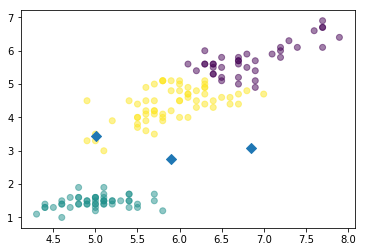

In [4]:
xs = X[:,0]
ys = X[:,2]
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

## Evaluating a clustering

* Can check correspondence with e.g. iris species
    * ... but what if there are no species to check against?
* Measure quality of a clustering
* Informs choice of how many clusters to look for

### Iris: clusters vs species
* k-means found 3 clusters amongst the iris samples
* Do the clusters correspond to the species?

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Aligning labels and species
df = pd.DataFrame({'labels': labels, 'species': y})

# Crosstab of labels and species
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species   0   1   2
labels             
0         0   2  36
1        50   0   0
2         0  48  14


### Measuring clustering quality
* Using only samples and their cluster labels
* A good clustering has tight clusters
* ... and samples in each cluster bunched together

### Inertia measures clustering quality
* Measures how spread out the clusters are (lower is better)
* Distance from each sample to centroid of its cluster
* After _.fit()_, available as a ribute _inertia_
* k-means a empts to minimize the inertia when choosing clusters

In [7]:
print(model.inertia_)

78.85144142614601


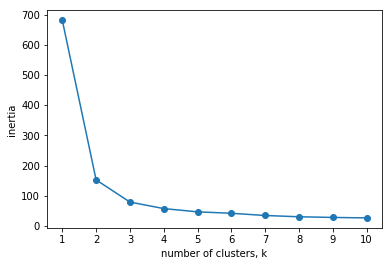

In [8]:
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### The number of clusters
* Clusterings of the iris dataset with different numbers of clusters
* More clusters means lower inertia
* What is the best number of clusters?
    * A good clustering has tight clusters (so low inertia)
    * ... but not too many clusters!
    * Choose an "elbow" in the inertia plot (Inertia vs number of cluster)
    * Where inertia begins to decrease more slowly
    * E.g. for iris dataset, 3 is a good choice

## Transforming features for better clusterings

* Piedmont wines dataset
    * 178 samples from 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
    * Features measure chemical composition e.g. alcohol content, and also visual properties like “color intensity”
    
* The wine features have very different variances!
* Variance of a feature measures spread of its values
* In kmeans: feature variance = feature influence
* __StandardScaler__ transforms each feature to have mean 0 and variance 1
* Features are said to be "standardized"

``` python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
    StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)
```

* Need to perform two steps: StandardScaler, then KMeans
* Use sklearn pipeline to combine multiple steps
* Data flows from one step into the next

``` python
In [1]: from sklearn.preprocessing import StandardScaler
In [2]: from sklearn.cluster import KMeans
In [3]: scaler = StandardScaler()
In [4]: kmeans = KMeans(n_clusters=3)
In [5]: from sklearn.pipeline import make_pipeline
In [6]: pipeline = make_pipeline(scaler, kmeans)
In [7]: pipeline.fit(samples)
Out[7]: Pipeline(steps=...)
In [8]: labels = pipeline.predict(samples)
```

* Feature standardization improves clustering
* StandardScaler is a "preprocessing" step
* MaxAbsScaler and Normalizer are other examples

While __StandardScaler()__ standardizes features by removing the mean and scaling to unit variance, __Normalizer()__ rescales each sample independently of the other.

## Visualizing hierarchies

* "t-SNE" : Creates a 2D map of a dataset
* "Hierarchical clustering"

### A hierarchy of groups
* Groups of living things can form a hierarchy (e.g. animals-> reptiles-> snakes/lizards)
* Clusters are contained in one another

``` python 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()
```

### Cluster labels in hierarchical clustering
* Not only a visualisation tool!
* Cluster labels at any intermediate stage can be recovered
* For use in e.g. cross-tabulations
* Height on dendrogram = distance between merging clusters
* Height on dendrogram specifies max. distance between merging clusters
* Don't merge clusters further apart than this

### Distance between clusters
* Defined by a "linkage method"
* Specified via method parameter, e.g. linkage(samples,method="complete")
* In "complete" linkage: distance between clusters is max. distance between their samples
* Different linkage method, different hierarchical clustering!

### Extracting cluster labels
* Use the fcluster method
* Returns a NumPy array of cluster labels

``` python
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion='distance')
print(labels)

# See which chountries are clustered together?
import pandas as pd
pairs = pd.DataFrame({'labels': labels,'countries': country_names})
print(pairs.sort_values('labels'))
countries labels
5    Belarus   1
40   Ukraine   1
17   Georgia   1
...
36   Spain     5
8    Bulgaria  6
19   Greece    6
10   Cyprus    6
28   Moldova   7
...
``` 

In __complete__ linkage, the distance between clusters is the distance between the furthest points of the clusters. In __single__ linkage, the distance between clusters is the distance between the closest points of the clusters.

### t-SNE for 2-dimensional maps
* t-SNE = “t-distributed stochastic neighbor embedding”
* Maps samples to 2D space (or 3D)
* Map approximately preserves nearness of samples
* Great for inspecting datasets

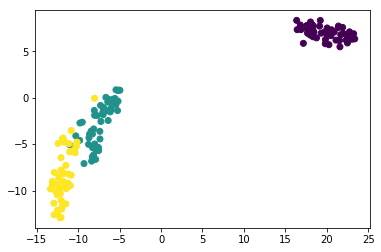

In [9]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=90)
transformed = model.fit_transform(X)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=y)
plt.show()

### t-SNE on the iris dataset
* Iris dataset has 4 measurements, so samples are 4-dimensional
* t-SNE maps samples to 2D space
* t-SNE didn't know that there were different species
    * ... yet kept the species mostly separate
    
### Interpreting t-SNE scatter plots
* “versicolor” and “virginica” harder to distinguish from one another
* Consistent with k-means inertia plot: could argue for 2 clusters, or for 3

### t-SNE has only fit_transform()
* Has a fit_transform() method
* Simultaneously fits the model and transforms the data
* Has no separate fit() or transform() methods
* Can’t extend the map to include new data samples
* Must start over each time!

### t-SNE learning rate
* Choose learning rate for the dataset
* Wrong choice: points bunch together
* t-SNE features are different every time

t-SNE provides great visualizations when the individual samples can be labeled.

``` python
# How to annotate each point in the scatter plot.

for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
```

## Visualizing the PCA transformation

### Dimension reduction
* More efficient storage and computation
* Remove less-informative "noise" features
    * ... which cause problems for prediction tasks, e.g. classification, regression
    
### PCA = "Principal Component Analysis"
* Fundamental dimension reduction technique
* First step "decorrelation"
* Second step reduces dimension

### PCA aligns data with axes
* Rotates data samples to be aligned with axes
* Shifts data samples so they have mean 0
* No information is lost

### PCA follows the fit/transform pattern
* PCA a scikit-learn component like KMeans or StandardScaler
* fit() learns the transformation from given data
* transform() applies the learned transformation
* transform() can also be applied to new data
    * Rows of transformed correspond to samples
    * Columns of transformed are the "PCA features"
    * Row gives PCA feature values of corresponding sample
    
### PCA features are not correlated
* Features of dataset are o en correlated
* PCA aligns the data with axes
* Resulting PCA features are not linearly correlated ("decorrelation")

### Pearson correlation
* Measures linear correlation of features
* Value between -1 and 1
* Value of 0 means no linear correlation

``` python 
from scipy.stats import pearsonr
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)
```

### Principal components
* "Principal components" = directions of variance
* PCA aligns principal components with the axes
* Available as _ components_ _a ribute of PCA object
* Each row defines displacement from mean

``` python 
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
    PCA(copy=True, ...)
transformed = model.transform(samples)
```

## Intrinsic dimension

### Intrinsic dimension of a flight path
* 2 features: longitude and latitude at points along a flight path
* Dataset appears to be 2-dimensional
* But can approximate using one feature: displacement along flight path
* Is intrinsically 1-dimensional

### Intrinsic dimension
* Intrinsic dimension = number of features needed to approximate the dataset
* Essential idea behind dimension reduction
* What is the most compact representation of the samples?
* Can be detected with PCA

### PCA identifies intrinsic dimension
* Scatter plots work only if samples have 2 or 3 features
* PCA identifies intrinsic dimension when samples have any number of features
* Intrinsic dimension = number of PCA features with significant variance

__Intrinsic dimension is number of PCA features with significant variance.__ Intrinsic dimension can be ambiguous, and it is an idealization: There is not always one correct answer!

``` python
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(samples) # samples = array of versicolor samples
    PCA(copy=True, ... )
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()
```

The arrows of the PCA can also be plotted.
```python 
# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
```

## Dimension reduction with PCA
    * Represents same data, using less features
    
* PCA features are in decreasing order of variance
* Assumes the low variance features are "noise"
    * ... and high variance features are informative
* Specify how many features to keep (e.g. keeps the first 2 PCA features)
    * PCA(n_components=2)
* Intrinsic dimension is a good choice

In [10]:
# Dimension reduction of iris dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
transformed = pca.transform(X)
print(transformed.shape)

(150, 2)


* PCA has reduced the dimension to 2
* Retained the 2 PCA features with highest variance
* Important information preserved: species remain distinct
* Discards low variance PCA features
* Assumes the high variance features are informative
* Assumption typically holds in practice (e.g. for iris)

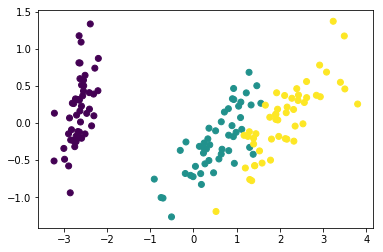

In [12]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=y)
plt.show()

### Word frequency arrays
* Rows represent documents, columns represent words
* Entries measure presence of each word in each document
    * ... measure using "tf-idf"
    
### Sparse arrays and csr_matrix
* Array is "sparse": most entries are zero
* Can use scipy.sparse.csr_matrix instead of NumPy array
* csr_matrix remembers only the non-zero entries (saves space!)

### TruncatedSVD and csr_matrix
* scikit-learn PCA doesn't support csr_matrix
* Use scikit-learn TruncatedSVD instead
* Performs same transformation

```python
from sklearn.decomposition import TruncatedSVD

model = TruncatedSVD(n_components=3)

model.fit(documents) # documents is csr_matrix
    TruncatedSVD(algorithm='randomized', ... )
    
transformed = model.transform(documents)
```

### Example: A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.
```python
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)
```

### Example: Clustering Wikipedia
TruncatedSVD is able to perform PCA on sparse arrays in _csr_matrix_ format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, the word-frequency matrix has been preconputed, so there's no need for a TfidfVectorizer).

```python
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import pandas as pd

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)
```

We are given an array _articles_ of tf-idf word-frequencies of some popular Wikipedia articles, and a list _titles_ of their titles. We use the pipeline to cluster the Wikipedia articles.

```python
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))
```

## Non-negative matrix factorization (NMF)
* Dimension reduction technique
* NMF models are interpretable (unlike PCA)
* Easy to interpret means easy to explain!
* However, all sample features must be non-negative (>= 0)

* __NMF expresses documents as combinations of topics (or "themes")__
* __NMF expresses images as combinations of patterns__

### Using scikit-learn NMF
* Follows fit() / transform() pattern
* Must specify number of components e.g. NMF(n_components=2)
* Works with NumPy arrays and with csr_matrix

### Example word-frequency array
* Word frequency array, 4 words, many documents
* Measure presence of words in each document using "tf-idf"
* "tf" = frequency of word in document
* "idf" reduces influence of frequent words

```python
from sklearn.decomposition import NMF

model = NMF(n_components=2)

model.fit(samples) # samples is the word-frequency array
    NMF(alpha=0.0, ... )
    
nmf_features = model.transform(samples)
```

### NMF components
* NMF has components just like PCA has principal components
* Dimension of components = dimension of samples
* Entries are non-negative
```python
print(model.components_)
```

### NMF features
* NMF feature values are non-negative
* Can be used to reconstruct the samples
    * ... combine feature values with components
    
$$feature[0]\times component[0]+feature[1]\times component[1]+...$$

* Can also be expressed as a product of matrices

### Example: NMF learns topics of documents
NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as _model_, while _words_ is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!

```python
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())
    (6, 13125)
    film       0.627877
    award      0.253131
    starred    0.245284
    role       0.211451
    actress    0.186398
    Name: 3, dtype: float64
```

## NMF learns interpretable parts

#### Consider:
* Word-frequency array articles (tf-idf)
* 20,000 scientific articles (rows)
* 800 words (columns)
```python
from sklearn.decomposition import NMF
nmf = NMF(n_components=10)
nmf.fit(articles)
    NMF(alpha=0.0, ... )
print(nmf.components_.shape)
(10, 800)
```

__NMF components are topics__

### NMF components
* For documents:
    * NMF components represent topics
    * NMF features combine topics into documents
* For images, NMF components are parts of images

### Explore the LED digits dataset
Use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array _samples_, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.
```python
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
    
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)
```

Unlike NMF, __PCA doesn't learn the parts of things__. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.
```python
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
```

__note:__ the _show_as_image()_ function colors a pixel red if the value is negative.

## Building recommender systems using NMF

### Finding similar articles
* Engineer at a large online newspaper
* Task: recommend articles similar to article being read by customer
* Similar articles should have similar topics

### Strategy
* Apply NMF to the word-frequency array
* NMF feature values describe the topics
    * ... __so similar documents have similar NMF feature values__
* Compare NMF feature values?

### Versions of articles
* Different versions of the same document have same topic proportions
    * ... exact feature values may be different!
    * E.g. because one version uses many meaningless words
* But all versions lie on the same line through the origin

### Cosine similarity
* Uses the angle between the lines
* Higher values means more similar
* Maximum value is 1, when angle is 0

```python
from sklearn.preprocessing import normalize

norm_features = normalize(nmf_features)

current_article = norm_features[23,:] # if has index 23

similarities = norm_features.dot(current_article)

print(similarities)
    [ 0.7150569 0.26349967 0.40210445 ..., 0.70462768
      0.20323616 0.05047817]
```

* Label similarities with the article titles, using a DataFrame
* Titles given as a list: titles

```python

import pandas as pd

df = pd.DataFrame(norm_features, index=titles)

current_article = df.loc['Dog bites man']

similarities = df.dot(current_article)

print(similarities.nlargest())
    Dog bites man                    1.000000
    Hound mauls cat                  0.979946
    Pets go wild!                    0.979708
    Dachshunds are dangerous         0.949641
    Our streets are no longer safe   0.900474
    dtype: float64
```

### Example: Which articles are similar to 'Cristiano Ronaldo'?

NMF features and the cosine similarity can be used to find similar articles. Apply this to a NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as _nmf_features_, while _titles_ is a list of the article titles.

```python
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())
    Cristiano Ronaldo                1.000000
    Franck Ribery                    0.999972
    Radamel Falcao                   0.999942
    Zlatan Ibrahimovic               0.999942
    France national football team    0.999923
    dtype: float64
```

### Example: Recommend musical artists

You are given a sparse array _artists_ whose rows correspond to artists and whose column correspond to users. The entries give the number of times each artist was listened to by each user. We build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to.

```python
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)
```

Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? The NMF features and the cosine similarity can be used to find similar musical artists. The names of the musical artists are available as the list _artist_names_.

```python
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())
```
